# Intituto tecnologico de Durango
## Analítica de datos en las organizaciones
### 5.3.1.4 Visualización avanzada de los datos













#### Nombre : Sarahi Caloso Mancillas
#### No de Control: 19040351
####  Maestro: José Gabriel Rodríguez Rivas


Objetivos

 Parte 1: Preparar los datos 
 
 Parte 2: Visualizar los datos

Situación/Contexto

En esta práctica de laboratorio, aprenderá cómo combinar base de datos SQLite, archivos JSON y estructuras de datos de pandas. Usted contará con una interfaz con un wrapper para la biblioteca folium que le permite graficar datos en un mapa geográfico. Se generará un mapa del Reino Unido dividido en áreas, cada una de color de sombreado que es proporcional a la velocidad de Internet, una interesante forma de comprender los datos. Con este mapa, estará claro cómo varía la velocidad de Internet a largo de Inglaterra. Aprenderá cómo encontrar y solucionar problemas con los datos.

Recursos necesarios

1 PC con acceso a Internet

Raspberry Pi versión 2 o superior

Bibliotecas de Python: pandas, numpy, sqlite3, matplotlib, folium_utils

Archivos de datos: LA_Poligons.json



# Parte 1: Preparar los datos
Para utilizar la biblioteca folium, modificará los datos para obtener el formato correcto. En este momento, los datos están en una base de datos de SQLite y deseamos tenerla en un marco de datos de pandas. Es necesario realizar algunos cambios más.

#### Paso 1: Obtener datos y guardarlos en un marco de datos pandas.

Primero, necesitamos obtener los datos. Nos conectaremos a la base de datos InternetSpeed.
 


#### a)	Importe las bibliotecas.

- pandas numpy

- sqlite3

- pyplot (y utilice el estilo fivethirtyeight u otro si lo prefiere)

- folium_utils 

In [1]:
# Code Cell 1
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
#import folium_utils
plt.style.use('fivethirtyeight')

%matplotlib inline

#### b) Conéctese a la base de datos.

Ahora es necesario regresar a la base de datos que creamos y que completamos en la segunda práctica de laboratorio del capítulo 2:

./Data/InternetSpeed.db

Conéctese a la base de datos.

In [4]:
# Code Cell 2
# Create the connection to the DataFrame
conn = sqlite3.connect('InternetSpeed.db') 

# Create a cursor
cur = conn.cursor() 

La base de datos contiene una tabla con el tiempo de ping, la velocidad de carga y la velocidad de descarga promedio para las diversas autoridades locales de Inglaterra. El objetivo de esta práctica de laboratorio es crear un mapa para mostrar cómo estos indicadores de velocidad de Internet cambian según las diferentes ciudades. Lo primero que debemos hacer es leer los datos de la tabla.

average_speed

Ahora agréguela al marco de datos  pandas con la función .read_sql().

Esta función necesita una cadena que contenga la consulta que se ejecutará y la variable que contiene la conexión a la base de datos (consulte http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql.html para obtener más detalles). Si suponemos que la consulta está almacenada en la variable query, la solicitud

pd.read_sql(query)

devolverá un marco de datos pandas.
#### c) Guarde los datos en un marco de datos.

Escriba la consulta para seleccionar todos los datos de la tabla average_speed y para colocarlos en un marco de datos.

In [26]:
# Code Cell 3
# Create a query to select all the data in the table average_speed
query = 'SELECT * FROM average_speed'

# Read the the data from the table into a DataFrame.
df = pd.read_sql(query, conn)


#### Paso 2: Limpieza de datos

Al utilizar las funciones pandas aprendidas hasta ahora, explore el marco de datos generada y elimine las columnas no deseadas.
#### a) Explore los datos.

Imprima las primeras filas del marco de datos df.

In [6]:
# Code Cell 4
# Insert code here
df.head()

,index,Area,Average_p,Average_u,Average_d
0,0,E07000188,8.451897,21.114114,51.967713
1,1,E07000101,8.317833,20.733028,51.709226
2,2,E09000030,8.983481,22.469438,54.412001
3,3,E09000031,8.956481,22.353593,55.138017
4,4,E09000032,9.144285,22.859003,55.962499


El índice de la columna no es necesario para este ejercicio.
#### b) Limpie los datos.

Obtenga el índice de la columna desde el marco de datos. Recuerde que el cambio será efectivo si el parámetro inplace está configurado en True (Verdadero) o si asigna el nuevo marco de datos modificada a un nuevo marco de datos.

In [7]:
# Code Cell 5
df.drop('index', inplace=True, axis=1)
print(df.shape)
df.head()

(326, 4)


,Area,Average_p,Average_u,Average_d
0,E07000188,8.451897,21.114114,51.967713
1,E07000101,8.317833,20.733028,51.709226
2,E09000030,8.983481,22.469438,54.412001
3,E09000031,8.956481,22.353593,55.138017
4,E09000032,9.144285,22.859003,55.962499


#### Paso 3: Familiarizarse con los archivos JSON.

El mapa se creará agota al trazar los límites de cada autoridad local y al colorearlas según un mapa de colores. El mapa codificado por colores indica la velocidad relativa de Internet de un área en relación con otras áreas.

Cada área se representa con un polígono, que se trazará en nuestro mapa. Los extremos de cada polígono representan los límites de cada autoridad local. Se proporciona un archivo JSON que contiene las coordenadas de los límites de cada autoridad local.

JSON es una alternativa popular a XML y es un formato utilizado para guardar e intercambiar datos (para conocer más sobre JSON consulte http://www.w3schools.com/js/js_json_intro.asp).
##### a) Abra y observe el archivo.

./Data/LA_poligons.json

Como en el caso de las funcionalidades proporcionadas para leer archivos csv y tablas SQL, es posible leer el contenido de un archivo JSON en un marco de datos pandas con el método read_json(). Este método ofrece una cadena de entrada que contiene la ruta hasta archivo que deseamos leer (consulte esta documentación para obtener más detalles: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_json.html).
##### b) Lea LA_poligons.json en un marco de datos pandas y luego visualice las primeras filas.

In [17]:
# Code Cell 6
# Read the JSON file into a DataFrame
la_json = pd.read_json('LA_poligons.json')

# Visualize the first rows of la_json DataFrame
# Insert code here
la_json.head()

,LA_code,geometry
0,E06000001,"{u'type': u'MultiPolygon', u'coordinates': [[[..."
1,E06000002,"{u'type': u'MultiPolygon', u'coordinates': [[[..."
2,E06000003,"{u'type': u'MultiPolygon', u'coordinates': [[[..."
3,E06000004,"{u'type': u'MultiPolygon', u'coordinates': [[[..."
4,E06000005,"{u'type': u'Polygon', u'coordinates': [[[-1.63..."


La información que contiene este marco de datos se utilizará más adelante en la visualización.
#### Paso 4: Calcular un promedio de velocidad de ping

Para cada mapa que se produzca, solo se podrá visualizar uno de los tres indicadores de velocidad de Internet (ping, la velocidad de carga o velocidad de descarga promedio). En esta práctica de laboratorio, nos centraremos en velocidad promedio de ping, pero se recomienda a los alumnos que repitan el ejercicio para visualizar las velocidades de carga y descarga.
##### a) Explique los datos.

Genere un nuevo marco de datos pandas que contenga sólo dos columnas: Area y Average_p. Para ello, selecciónelas desde el marco de datos que contiene los datos de la base de datos InternetSpeed. Ahora, cambie el nombre de la columna Area por LA_code mediante el método rename(). Deberá pasar al método el campo columns con este código:

columns={'Area':'LA_code'}

    Cree un nuevo marco de datos.
    Cambie el nombre de las columnas.
    Muestre las primeras líneas del nuevo marco de datos.



In [18]:
# Code Cell 7
dfp = df[['Area', 'Average_p']]
dfp=dfp.rename(columns={'Area':'LA_code'})
dfp.head()

,LA_code,Average_p
0,E07000188,8.451897
1,E07000101,8.317833
2,E09000030,8.983481
3,E09000031,8.956481
4,E09000032,9.144285



De manera predeterminada, folium utiliza sólo 6 colores diferentes para definir un mapa de colores. En lugar de definir un mapa de colores personalizado, los datos del indicador de velocidad de Internet se dividieron en 6 cubos y cada uno de ellos estará vinculado a un color diferente. Los cubos deben definirse cuidadosamente para maximizar las diferencias entre las diferentes áreas. Para elegir los cubos es recomendable observar el rango de los datos.

Hasta ahora, se puede acceder a las columnas de un marco de datos pandas de la siguiente manera:

df['Name_of_the_column']

Una manera alternativa de hacerlo es:

df.Name_of_the_column


In [19]:
# Code Cell 8
print(dfp.Average_p.min())
print(dfp.Average_p.max())

0.0
11.999447541819524



El tiempo del ping se encuentra aproximadamente en el intervalo 0-12. Si los cubos se eligen para ser [0, 10, 20, 30, 40, 50], todos los datos irían al primer cubo y todas las áreas se representarían con el primer color. Un buen punto de partida es considerar el rango donde se alojan datos en vivo y dividirlo en seis partes distintas.

Para crear cubos, utilice el método numpy arange(). Este método considera, como entrada, el valor mínimo del rango, el valor máximo del rango y la transferencia. Si se requieren 6 cubos en el rango 1 a 12, la activación de función será la siguiente:

np.arange(1, 12, (12-1)/6)

b) Seleccione los cubos de visualización correctos.

Cree un rango de seis valores que vaya del valor mínimo al máximo de la velocidad promedio de ping y agréguelo a una lista (list(p_bins)).


In [20]:
# Code Cell 9
p_bins = np.arange(dfp.Average_p.min(), dfp.Average_p.max(), (dfp.Average_p.max()-dfp.Average_p.min())/10)

p_bins = list(p_bins)
print(p_bins)

[0.0, 1.1999447541819523, 2.3998895083639047, 3.599834262545857, 4.799779016727809, 5.999723770909762, 7.199668525091714, 8.399613279273666, 9.599558033455619, 10.799502787637572]



## Parte 2: Visualizar los datos

En la carpeta que contiene el código, hay una secuencia de Python que contiene algunas funciones que ayudan a visualizar datos en un mapa. La biblioteca principal que utiliza es folium. La documentación de la biblioteca se encuentra aquí: https://folium.readthedocs.io/en/latest/).

Puede importar las funciones en una secuencia de Python al igual que en cualquier otra biblioteca.
Paso 1: Graficar los datos en un mapa.
##### a) Obtenga información sobre el código folium_utils

Abra el archivo de origen folium_utils.py de Python y léalo detenidamente. Esta secuencia contiene algunas funciones que utilizan la biblioteca folium

¿Puede identificar la función principal que vamos a utilizar más adelante en la notebook?

Este código abarca lo que debe describir un usuario como múltiples funciones dentro de una con una interfaz más simple.

Para generar el primer mapa, utilice la función

    folium_top_x_preds_mapper()

que se encuentra en folium_utils.
##### b) Active la función folium_top_x_preds_mapper() con los siguientes parámetros:

    El marco de datos que contiene los datos que se visualizarán (dfp)
    El marco de datos que contiene las coordinadas de los polígonos (la_json)
    El nombre de la columna en la que se combinarán dos estructuras de datos (LA_code)
    El nombre de la columna que contiene datos para graficar (Average_p)
    La lista que contiene los límites de cubos (p_bins)


In [21]:
# Code Cell 10
# Create the map
import folium
import ast
#  mymap = folium_utils.folium_top_x_preds_mapper(...)
def selected_json_dict_generator(full_list_df, geo_label, geo_label_list):

    
    allowed_df = full_list_df[full_list_df[geo_label].isin(geo_label_list)]
    
    output_dict =  {'crs':{u'properties': {u'name': u'urn:ogc:def:crs:OGC:1.3:CRS84'}, u'type': u'name'},
                    'type':'FeatureCollection',
                    'features':[{'geometry':ast.literal_eval(allowed_df['geometry'].iloc[i]), 
                                 'type':'Feature', 
                                 'properties':{ geo_label : allowed_df[geo_label].iloc[i]},'type':'Feature'}
                                  for i in range(len(allowed_df))]
                   }
    
    return output_dict

bins = list(dfp.Average_p.quantile([0, 0.1, 0.4, 0.6 ,0.8, 1]))
top_x_jsons = selected_json_dict_generator(la_json, 'LA_code', dfp['LA_code'].values)
top_x_data = dfp.copy()

m = folium.Map(location=[52.061, -1.336], zoom_start=6)

folium.Choropleth(
    geo_data=top_x_jsons,
    data=top_x_data,
    columns=['LA_code','Average_p'],
    key_on="feature.id",
    fill_color="BuPu",
    fill_opacity=0.7,
    line_opacity=0.5,
    bins=bins,).add_to(m)
m

ValueError: key_on `'id'` not found in GeoJSON.

¿Qué ocurrió? La cantidad de autoridades locales de las dos estructuras de datos dfp y la_json no coincide y Folium arroja un error.

Examine los datos:
##### c) Grafique la columna Average_p.

pandas brinda las funcionalidades básicas para generar los gráficos a partir del marco de datos. El método de gráfico en Series y en el marco de datos es solo un simple wrapper enplt.plot(), pero ahorra algunas líneas de códigos.

Puede activar el método plot() directamente en la columna que desee graficar(dfp.Average_p.plot()).

(Consulte http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html para obtener más detalles sobre visualización en pandas).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LA_code    326 non-null    object 
 1   Average_p  326 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.2+ KB


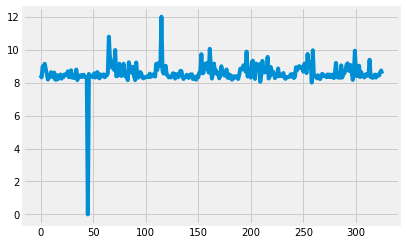

In [14]:
# Code Cell 11
# Insert code here
dfp.Average_p.plot()
dfp.info()

La visualización muestra que hay una autoridad local para cual la velocidad promedio de Internet es cero. Debido a que es claramente una anomalía, es necesario realizar un análisis detallado.
##### d) Seleccione la fila en la que la velocidad promedio es cero en el marco de datos.

In [16]:
# Code Cell 12
dfp[dfp.Average_p== 0.0]

,LA_code,Average_p
45,DateTime,0.0


DateTime no es el nombre de una autoridad local: hubo un error en la recopilación o en el almacenamiento de datos.
Paso 2: Corregir los datos y graficarlos en un mapa nuevamente.
##### a) elimine la fila incorrecta de su marco de datos.
Recuerde que para que el cambio sea efectivo, el indicador inplace se debe encontrar en True

<AxesSubplot:>

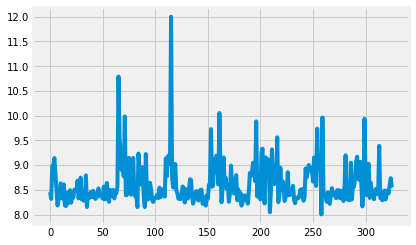

In [22]:
# Code Cell 13
# hint: you can use the index (44) to remove the row
dfp.drop(45,inplace=True)
# Plot here the cleaned data
dfp.Average_p.plot()

Ahora que los datos lucen mejor, trace el mapa nuevamente activando la función en el wrapper de folium.
##### b) Active la función folium_top_x_preds_mapper() nuevamente con los mismos parámetros que antes

In [23]:
# Code Cell 14
# mymap = ...?
def selected_json_dict_generator(full_list_df, geo_label, geo_label_list):

    allowed_df = full_list_df[full_list_df[geo_label].isin(geo_label_list)]
    
    output_dict =  {'crs':{u'properties': {u'name': u'urn:ogc:def:crs:OGC:1.3:CRS84'}, u'type': u'name'},
                    'type':'FeatureCollection',
                    'features':[{'geometry':ast.literal_eval(allowed_df['geometry'].iloc[i]), 
                                 'type':'Feature', 
                                 'properties':{ geo_label : allowed_df[geo_label].iloc[i]},'type':'Feature'}
                                  for i in range(len(allowed_df))]
                   }
    
    return output_dict

bins = list(dfp.Average_p.quantile([0, 0.1, 0.4, 0.6 ,0.8, 1]))
print('bins - ' , bins)
top_x_jsons = selected_json_dict_generator(la_json, 'LA_code', dfp['LA_code'].values)
top_x_data = dfp.copy()

m = folium.Map(location=[52.061, -1.336], zoom_start=6)

folium.Choropleth(
    geo_data=top_x_jsons,
    data=top_x_data,
    columns=['LA_code','Average_p'],
    key_on="feature.id",
    fill_color="BuPu",
    fill_opacity=0.6,
    line_opacity=-1,
    legend_name='Average_p',
    bins=bins,
    reset=True
).add_to(m)

bins -  [8.00433373382758, 8.281332642530225, 8.42009286580533, 8.53516786256231, 8.854774678487471, 11.999447541819524]


ValueError: key_on `'id'` not found in GeoJSON.

Deberá visualizar un mapa con solo dos colores para los cubos 6 a 8 y 8 a 10. ¿Qué sucedió allí?

El valor 0 fue eliminado, ya que resultó ser una anomalía, pero el rango de los cubos para el mapa de colores no se modificó. ¿Cuál es el nuevo valor mínimo para Average_p?

In [24]:
# Code Cell 15
print(dfp.Average_p.min())

8.00433373382758


Es necesario repetir la creación de cubos con el conjunto de datos limpio. Luego, active la función folium_top_x_preds_mapper() para visualizar correctamente la velocidad promedio de ping en el Reino Unido.
##### c) Vuelva a crear el rango del cubo, recree el mapa y visualícelo.

In [25]:
# Code Cell 16
def selected_json_dict_generator(full_list_df, geo_label, geo_label_list):
    
    allowed_df = full_list_df[full_list_df[geo_label].isin(geo_label_list)]
    
    output_dict =  {'crs':{u'properties': {u'name': u'urn:ogc:def:crs:OGC:1.3:CRS84'}, u'type': u'name'},
                    'type':'FeatureCollection',
                    'features':[{'geometry':ast.literal_eval(allowed_df['geometry'].iloc[i]), 
                                 'type':'Feature', 
                                 'properties':{ geo_label : allowed_df[geo_label].iloc[i]},'type':'Feature'}
                                  for i in range(len(allowed_df))]
                   }
    
    return output_dict

#bins = list(dfp.Average_p.quantile([0.0, 0.2, 0.4, 0.6 ,0.8, 1]))
bins1= [1,12,23,34,45,60]
top_x_jsons = selected_json_dict_generator(la_json, 'LA_code', dfp['LA_code'].values)
top_x_data = dfp.copy()

m = folium.Map(location=[52.061, -1.336], zoom_start=6)

folium.Choropleth(
    geo_data=top_x_jsons,
    data=top_x_data,
    columns=['LA_code','Average_p'],
    key_on="feature.id",
    fill_color="BuPu",
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name="Average_p",
    bins=bins1,
    reset=True,
).add_to(m)

m

ValueError: key_on `'id'` not found in GeoJSON.

¡Mucho mejor!

La visualización de datos con un gráfico de línea simple nos permite detectar un error muy fácilmente. A veces, es necesario realizar una investigación más detallada.

Para realizar prácticas adicionales, repita el ejercicio, pero cree aparece las visualizaciones para las columnas Average_d (velocidad de descarga promedio) y Average_u (velocidad de carga promedio).